In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scenarios_original import Scenario
from sim_wrapper import simWrapper

In [2]:
%load_ext autoreload
%autoreload 2

## Plot p_Y and p_Z for various scenarios

In [3]:
scene_typ = "nonunique"
method_typ = "naive_nonunique"
m_lst = np.linspace(-1, 1, 501)
sim = simWrapper(scene_typ, method_typ, arggs="temp")
p_Y = sim.p_Y
EY_bands = np.zeros(501)
EZ_bands = np.zeros(501)
XX = np.random.uniform(-1, 1, 100000) # uniform
for i, m in enumerate(m_lst):
    d = lambda x: x>=m
    Y_t = p_Y(d(XX), XX)
    EY_bands[i] = np.mean(Y_t)

for i, m in enumerate(m_lst):
    d = lambda x: x>=m
    Z_t = sim.p_Z(d(XX), XX)
    EZ_bands[i] = np.mean(Z_t)

In [4]:
def mean_func_nonuni(A, X):
    return ((X+0.4)*(X<=-0.4)+X*(X>=0))*A

def p_Y(A, X, mean_func):
    # conditional distribution of Y|A,X
    return np.random.normal(loc=mean_func(A, X), scale=0.25)

m_lst = np.linspace(-1, 1, 501)
EY_bands = np.zeros(501)
XX = np.random.uniform(-1, 1, 1000000) # uniform
A = np.random.binomial(1, 0.5+0.1*XX)
ss = mean_func_nonuni(A, XX)
for i, m in enumerate(m_lst):
    d = lambda x: x>=m
    Y_t = p_Y(d(XX), XX, mean_func_nonuni)
    EY_bands[i] = np.mean(Y_t)

In [5]:
scene_typ_lst = ["nonunique", "unique_corr", "unique_noncorr"]
method_typ = "naive_unique"
m_lst = np.linspace(-1, 1, 501)
EY_bands = np.zeros([3, 501])
EZ_bands = np.zeros([3, 501])
XX = np.random.uniform(-1, 1, 100000) # uniform
for j, scene_typ in enumerate(scene_typ_lst):
    sim = simWrapper(scene_typ, method_typ, arggs="temp")
    
    p_Y = sim.p_Y
    XX = np.random.uniform(-1, 1, 100000) # uniform
    for i, m in enumerate(m_lst):
        d = lambda x: x>=m
        Y_t = p_Y(d(XX), XX)
        EY_bands[j,i] = np.mean(Y_t)

    for i, m in enumerate(m_lst):
        d = lambda x: x>=m
        Z_t = sim.p_Z(d(XX), XX)
        EZ_bands[j,i] = np.mean(Z_t)
    
    #EY_bands[j] = sim.EY_bands
    # initialize EZ bands
#     for i, m in enumerate(m_lst):
#         d = lambda x: x>=m
#         Z_t = sim.p_Z(d(XX), XX)
#         EZ_bands[j,i] = np.mean(Z_t)

## create facet plot

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
EZ_bands.shape

(3, 501)

In [24]:
m_lst_long = np.array([m_lst, m_lst, m_lst]).flatten()

In [25]:
dat_array = np.concatenate((m_lst_long.reshape(1, -1), EY_bands.flatten().reshape(1,-1), EZ_bands.flatten().reshape(1,-1)), axis=0)
dat_array = dat_array.transpose()

In [26]:
df = pd.DataFrame(dat_array, columns = ["policy", "Phi value", "Psi value"])

In [27]:
df

,policy,Phi value,Psi value
0,-1.000,0.158814,-0.600104
1,-0.996,0.158963,-0.598319
2,-0.992,0.161904,-0.591697
3,-0.988,0.161962,-0.588094
4,-0.984,0.164107,-0.585217
...,...,...,...
1498,0.984,0.009167,0.013102
1499,0.988,0.005513,0.010239
1500,0.992,0.003935,0.007780
1501,0.996,0.002974,0.003377


In [28]:
scenarios = np.repeat(["nonunique", "unique non-margin", "unique margin"], 501)
df['Scenario'] = scenarios

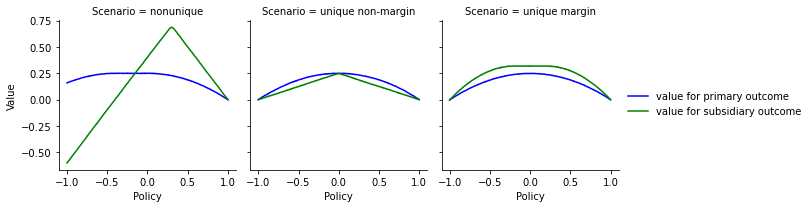

In [29]:
g = sns.FacetGrid(df, col="Scenario")
g.map(plt.plot, "policy", "Phi value", color='blue', label='value for primary outcome')
g.map(plt.plot, "policy", "Psi value", color='green', label='value for subsidiary outcome')

max_val = df['Phi value'].max()
max_cat = df[df['Phi value'] == max_val]['policy'].values[0]
# # Annotate max value on each subplot
# for ax in g.axes.flat:
#     max_height = max([p.get_height() for p in ax.patches])
#     for patch in ax.patches:
#         if patch.get_height() == max_height:
#             ax.plot([patch.get_x()+patch.get_width()/2., patch.get_x()+patch.get_width()/2.], [0, max_height], 'r-')

g.set_axis_labels("Policy", "Value")
#g.fig.suptitle("", y=1.02)
g.add_legend()

#plt.show()
plt.savefig("scenarios.pdf")

In [17]:
scene_typ_lst = ["nonunique", "unique_corr", "unique_noncorr"]
method_typ = "naive_unique"
len_m = 501
len_X = 1000
s_X = np.zeros([3, len_X])
q_X = np.zeros([3, len_X])

for j, scene_typ in enumerate(scene_typ_lst):
    sim = simWrapper(scene_typ, method_typ, arggs="temp")
    
    p_Y = sim.mean_func
    p_Z = sim.mean_func_Z
    XX = np.linspace(-1, 1, len_X) # uniform
    Y_vals = np.zeros([len_m, len_X])
    Z_vals = np.zeros([len_m, len_X])
    q_X[j] = p_Y(1, XX) - p_Y(0, XX)
    s_X[j] = p_Z(1, XX) - p_Z(0, XX)

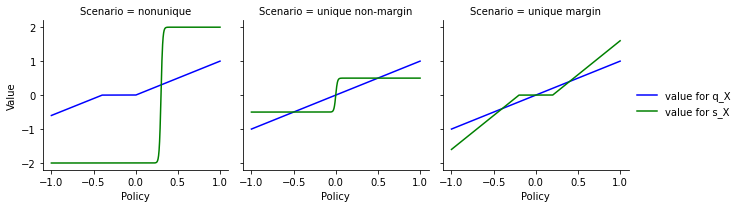

In [31]:
XX_long = np.array([XX, XX, XX]).flatten()
dat_array = np.concatenate((XX_long.reshape(1, -1), s_X.flatten().reshape(1,-1), q_X.flatten().reshape(1,-1)), axis=0)
dat_array = dat_array.transpose()
df = pd.DataFrame(dat_array, columns = ["policy", "s_X value", "q_X value"])
scenarios = np.repeat(["nonunique", "unique non-margin", "unique margin"], len_X)
df['Scenario'] = scenarios

g = sns.FacetGrid(df, col="Scenario")
g.map(plt.plot, "policy", "q_X value", color='blue', label='value for q_X')
g.map(plt.plot, "policy", "s_X value", color='green', label='value for s_X')

max_val = df['s_X value'].max()
max_cat = df[df['s_X value'] == max_val]['policy'].values[0]
# Annotate max value on each subplot
# for ax in g.axes.flat:
#     max_height = max([p.get_height() for p in ax.patches])
#     for patch in ax.patches:
#         if patch.get_height() == max_height:
#             ax.plot([patch.get_x()+patch.get_width()/2., patch.get_x()+patch.get_width()/2.], [0, max_height], 'r-')

g.set_axis_labels("Policy", "Value")
#g.fig.suptitle("", y=1.02)
g.add_legend()

#plt.show()
plt.savefig("sxqx.pdf")